In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df.shape

(891, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.drop(columns=['Cabin'], inplace = True)

In [18]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)


In [19]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
df.fillna({'Embarked': 'S'}, inplace = True)

In [22]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [24]:
df.describe()


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='count', ylabel='Survived'>

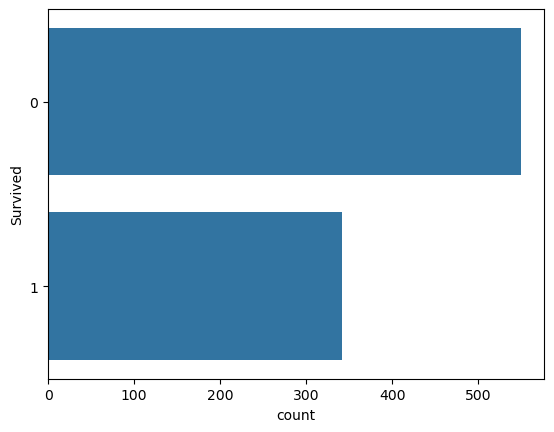

In [29]:
#Survival plot

sns.countplot(df['Survived'])

<Axes: xlabel='count', ylabel='Pclass'>

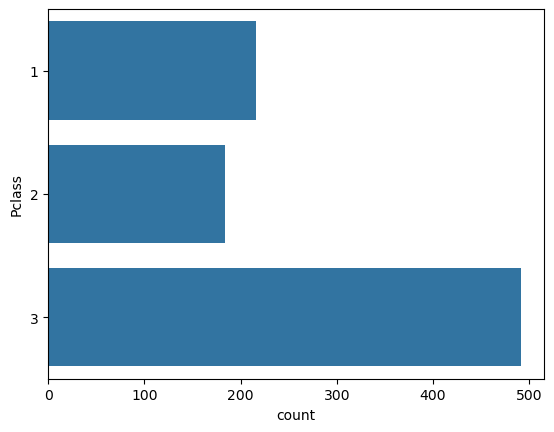

In [35]:
#death in passenger class

sns.countplot(df['Pclass'])

In [36]:
# in percentage 

print((df['Pclass'].value_counts()/891)*100)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


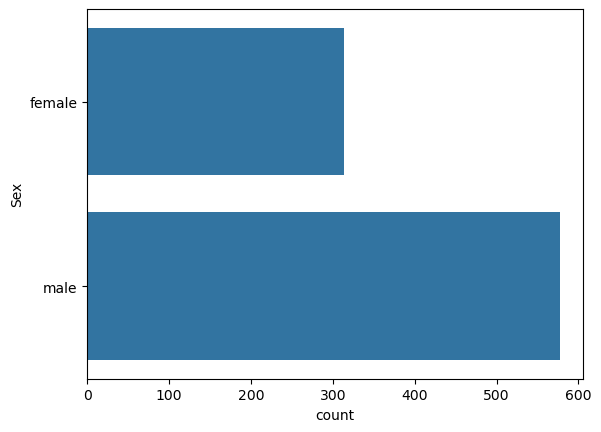

In [37]:
#death with gender

sns.countplot(df['Sex'])
print((df['Sex'].value_counts()/891)*100)

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


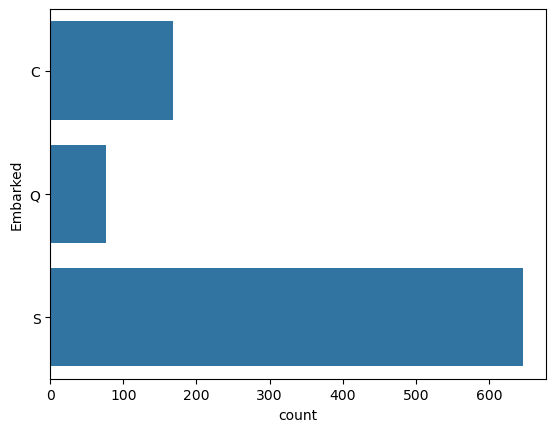

In [38]:
#death with destination

sns.countplot(df['Embarked'])
print((df['Embarked'].value_counts()/891)*100)

Age
29    22.109989
24     3.479237
22     3.030303
28     3.030303
30     3.030303
        ...    
66     0.112233
53     0.112233
80     0.112233
12     0.112233
74     0.112233
Name: count, Length: 71, dtype: float64


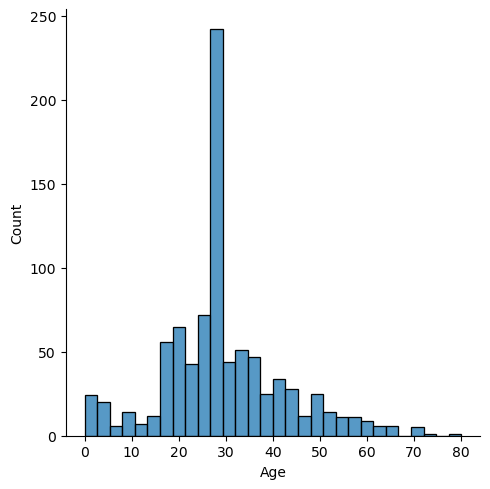

In [41]:
#death with age

sns.displot(df['Age'])
print((df['Age'].value_counts()/891)*100)

<Axes: ylabel='Age'>

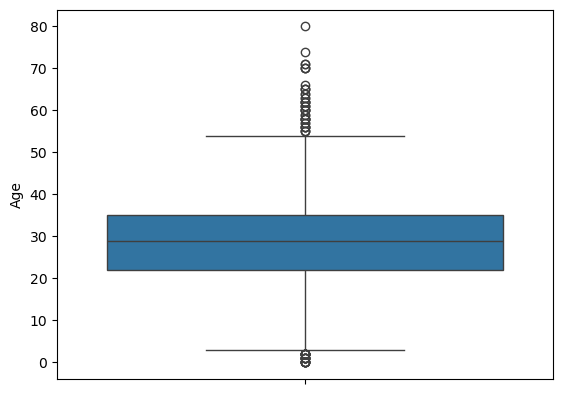

In [43]:
sns.boxplot(df['Age'])

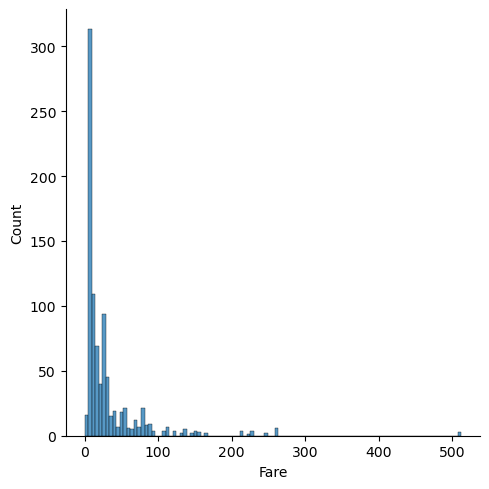

In [47]:
sns.displot(df['Fare'])

<Axes: xlabel='Fare'>

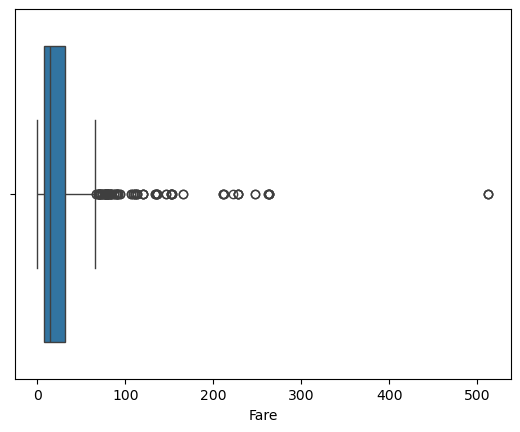

In [53]:
sns.boxplot(x='Fare', data=df)

<Axes: xlabel='Survived', ylabel='count'>

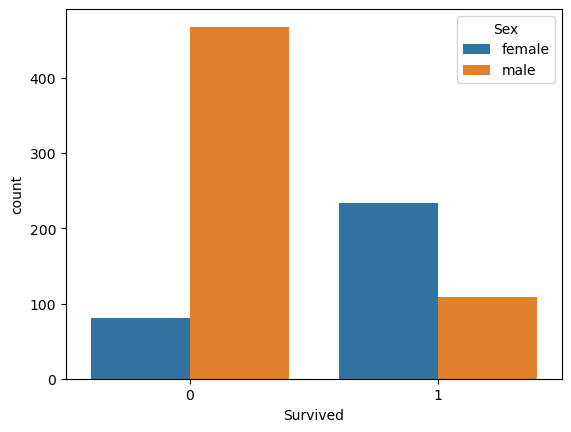

In [54]:
# survival with sex
sns.countplot(x='Survived', hue='Sex', data=df)


In [57]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [58]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


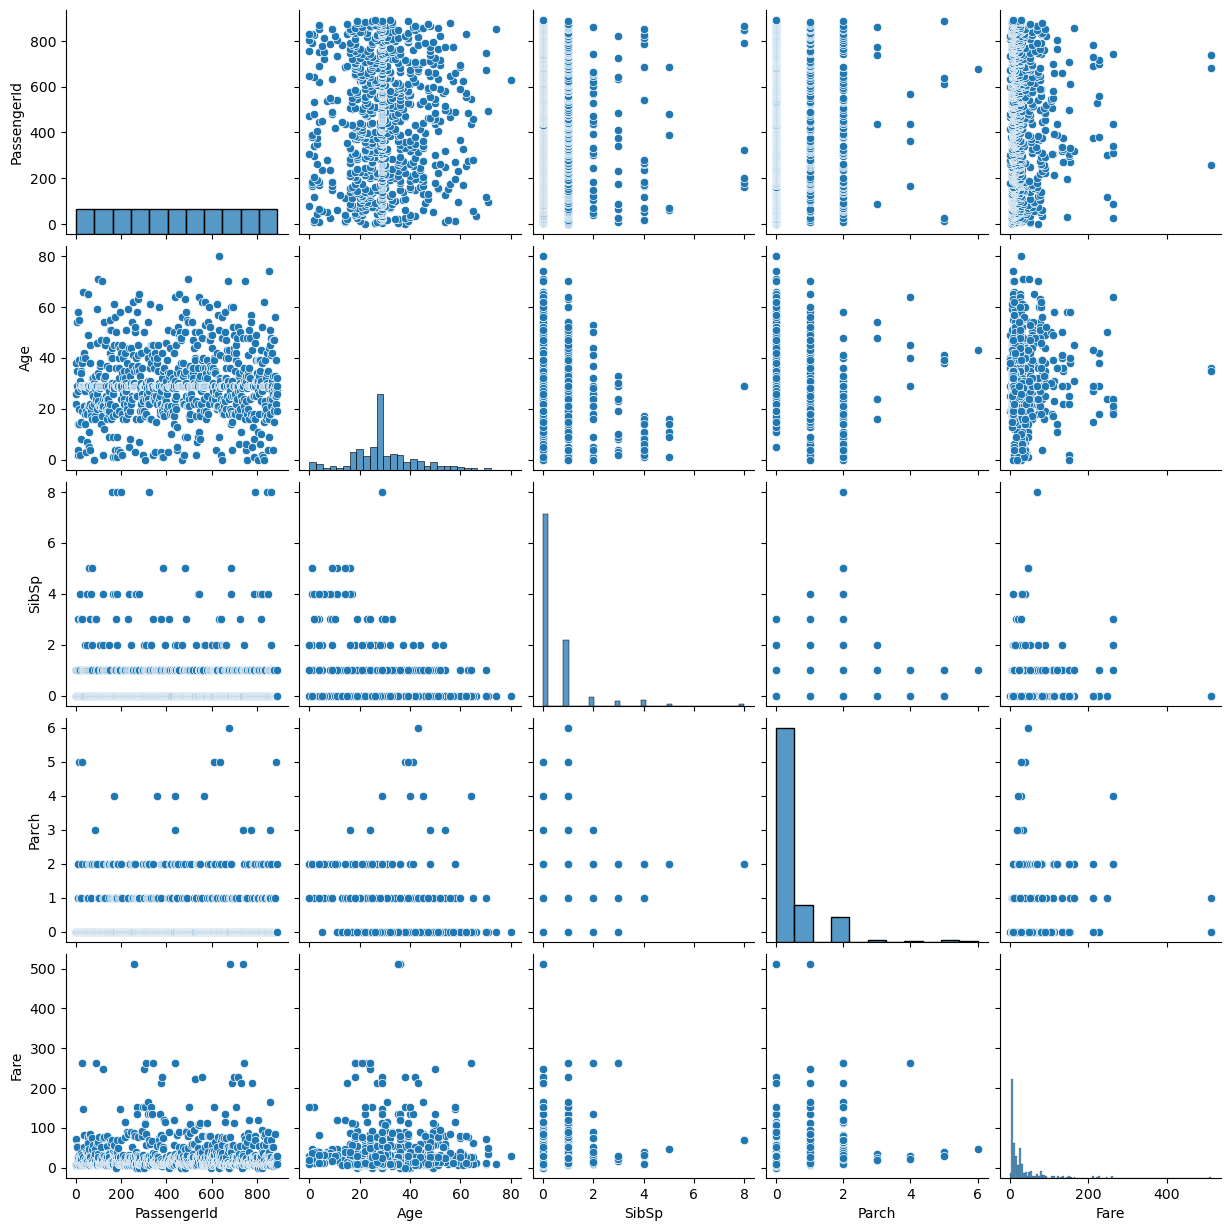

In [60]:
sns.pairplot(df)

<Axes: >

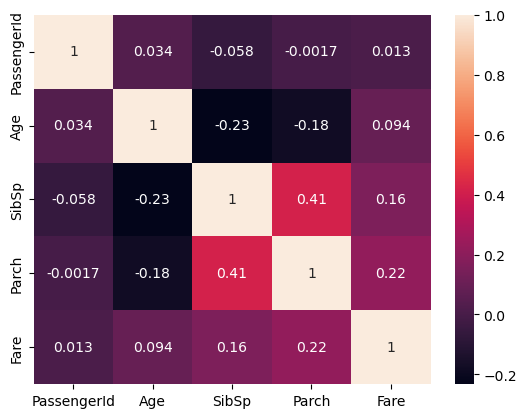

In [64]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


In [65]:
# Feature Engineering

df['family_size'] = df['SibSp'] + df['Parch'] 

In [67]:
def family_type(number):
    if number == 0:
        return 'Alone'
    elif number>0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'

In [69]:
df['family_type'] = df['family_size'].apply(family_type) 


In [70]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45,1,1,F.C.C. 13529,26.2500,S,2,Medium
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18,1,0,349237,17.8000,S,1,Medium
477,478,0,3,"Braund, Mr. Lewis Richard",male,29,1,0,3460,7.0458,S,1,Medium
673,674,1,2,"Wilhelms, Mr. Charles",male,31,0,0,244270,13.0000,S,0,Alone
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43,0,1,24160,211.3375,S,1,Medium


In [71]:
df.drop( columns = ['SibSp', 'Parch', 'family_size', 'PassengerId'], inplace = True)

In [72]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
684,0,2,"Brown, Mr. Thomas William Solomon",male,60,29750,39.0000,S,Medium
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,347742,11.1333,S,Medium
692,1,3,"Lam, Mr. Ali",male,29,1601,56.4958,S,Alone
289,1,3,"Connolly, Miss. Kate",female,22,370373,7.7500,Q,Alone
774,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54,29105,23.0000,S,Medium


In [73]:
df.describe()


,Age,Fare
count,891.000000,891.000000
mean,29.544332,32.204208
std,13.013778,49.693429
min,0.000000,0.000000
25%,22.000000,7.910400
50%,29.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [74]:
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,Medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,Medium
2,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,Medium
4,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,Alone


# Conclusions

1. Chances of female survival was higher
2. Travelling in Pclass 3 was deadliest
3. People going to C survived more
4. People ranging 20 to 40 had higher chance of not surviving